## Challenge: If a tree falls in the forest 

Random forests are basically a collection of decision trees. But how do the accuracies of the two models compare?

- Pick a dataset. Build the best decision tree you can.

- Now try to match that with the simplest random forest you can. How do the accuracies of the two models compare?

- Measure simplicity with runtime. Compare the runtime of the decision tree and the Random Forest.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time as t
import sklearn.ensemble
%matplotlib inline 

import graphviz
import pydotplus
from IPython.display import Image

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
mushroom = pd.read_csv('mushrooms.csv')

In [3]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
mushroom.isnull().sum()  # no null values yay!

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
mushroom.nunique()  # number of unique values -- the dummy variables will increase a lot in terms of attributes. 

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [7]:
mushroom.shape  # 23 variables, 8124 rows  

(8124, 23)

In [8]:
#for col in mushroom.columns:
#    mush_col = mushroom[col].unique().tolist()
##
#for col in mushroom_enc.columns:
#    mush_enc_col = mushroom_enc[col].unique().tolist()
#
#lst = zip(mush_col, mush_enc_col)
#for values in lst.v: 
#    print(values)

In [9]:
# This dataset has all values in string, we are going to convert them to numeric. 

### ---> Label Encoding is not a good idea because it implies rank-order and distance, typical for continuous variables.
### ---> ideally if there were categorical variables with rank orders, this would have been suitable.  

#from sklearn.preprocessing import LabelEncoder  # LE is an utility class to help normalize labels such that they contain only values between 0 and n_classes-1. 
#labelencoder = LabelEncoder()
#
#mush_enc = pd.DataFrame()
##le_name_mapping = {}
#for col in mushroom.columns:
#    #labelencoder.fit_transform(mushroom[col])
#    # use fit_transform if you are not interested in inversse transform -- use fit and transform separately instead
#    # see: https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
#    
#    mush_enc[col] = labelencoder.fit_transform(mushroom[col])
##    labelencoder.transform(mushroom[col])
#    le_name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))  # to get the mapping of the values
#    print(col, le_name_mapping)
#    
## note "?" in stalk-root

In [10]:
# Actual dataset with string values

mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
# Dataset with numerical values 

#mush_enc.head()


# .dummies is better because the LE implies relatioship between the values of one categorical variables. 
# if the values had relationship (5, 10, 15) then label encoding would make sense. 

# Run the model with dummies 

In [12]:
print(mushroom.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [13]:
# Creating subsets on the basis of mushroom characteristics 

mush_cap = mushroom[['cap-shape', 'cap-surface', 'cap-color']]
mush_gill = mushroom[['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']]
mush_stalk = mushroom[['stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring']]
mush_veil = mushroom[['veil-type', 'veil-color']]
mush_demo = mushroom[['bruises', 'odor','population', 'habitat']]

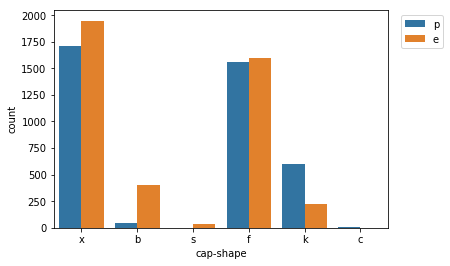

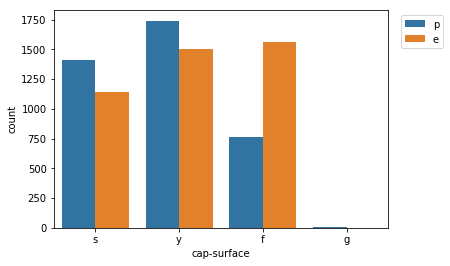

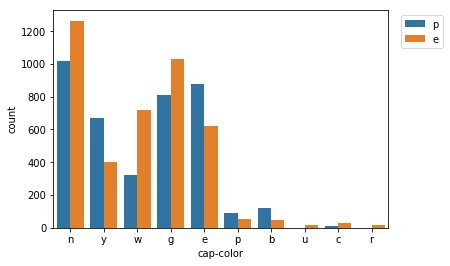

In [14]:
# Visualizing edible and poisonouns mushrooms wrt cap properties

for col in mush_cap.columns:

    sns.countplot(x= col,hue=mushroom['class'], data=mush_cap)
   
    plt.legend(loc=9, bbox_to_anchor=(1.1, 1))
    plt.show()

### ---> If cap-shape is 'b' bellshaped then there is a 90% chance that they are edible. So this is a good feature for using in the model.
### --> Cap color and surface are not useble enough as the features are not distinctive enough for the classification. 

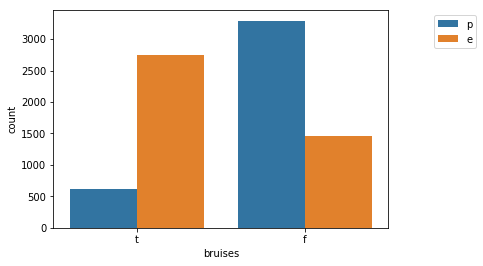

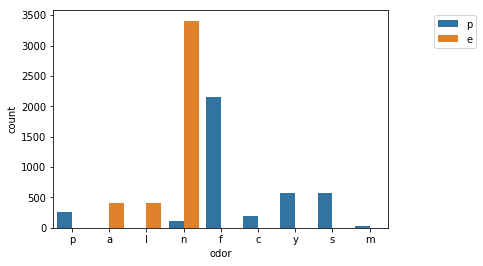

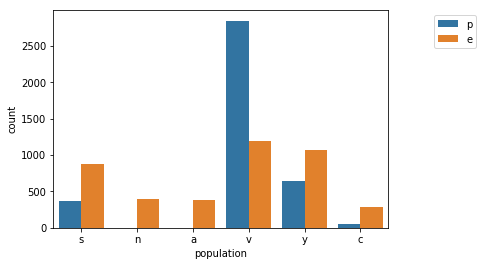

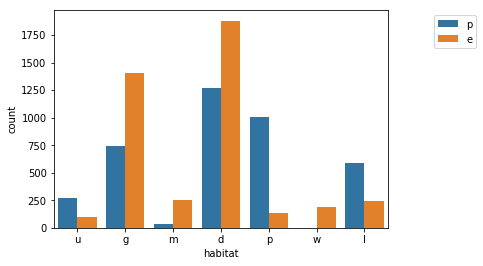

In [15]:
# Visualizing edible and poisonouns mushrooms wrt demographic properties

for col in mush_demo.columns:
    sns.countplot(x= col,hue=mushroom['class'], data=mush_demo)
    plt.legend(loc=9, bbox_to_anchor=(1.2, 1))
    plt.show()


# 'Odor' is a good distinguishing feature - certain values are distinctively edible and some are distinctively poisonous. 

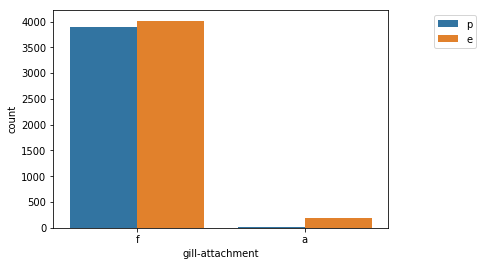

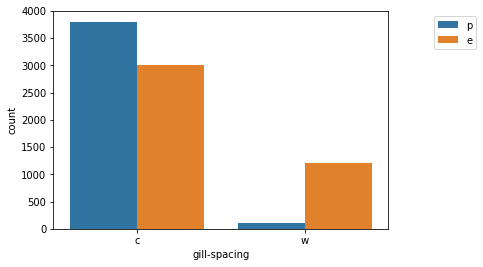

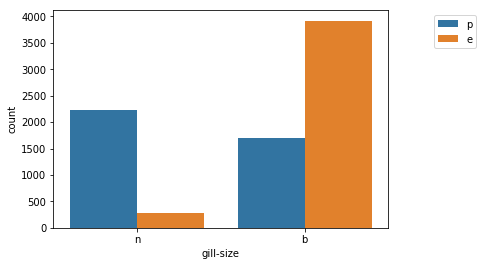

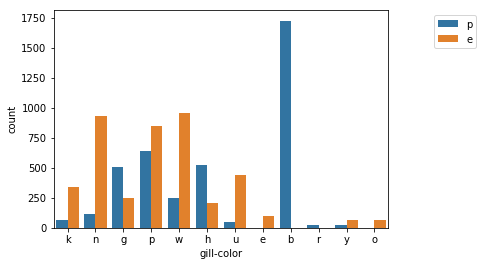

In [16]:
# Visualizing edible and poisonouns mushrooms wrt gill properties

for col in mush_gill.columns:
    sns.countplot(x= col,hue=mushroom['class'], data=mush_gill)
    plt.legend(loc=9, bbox_to_anchor=(1.2, 1))
    plt.show()

### --> gill size and gill color could be useful. 

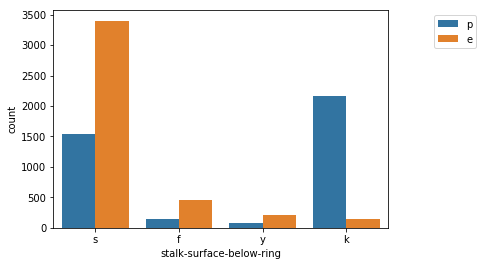

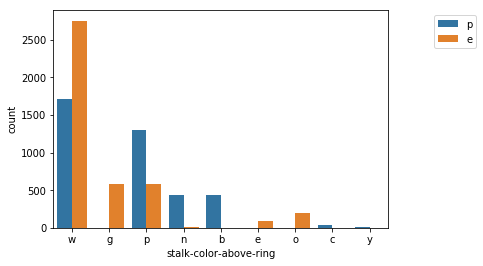

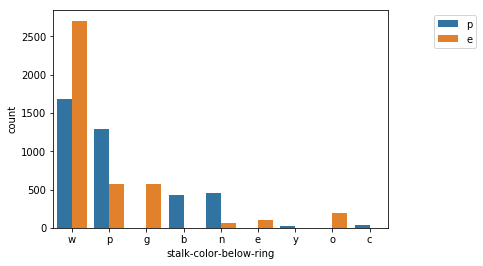

In [17]:
# Visualizing edible and poisonouns mushrooms wrt stalk properties

for col in mush_stalk.columns:
    sns.countplot(x= col,hue=mushroom['class'], data=mush_stalk)
    plt.legend(loc=9, bbox_to_anchor=(1.2, 1))
    plt.show()
    
# most stalk properties are not useful, expect stalk-surface-over-ring has one value that is distinctively poisonous. 

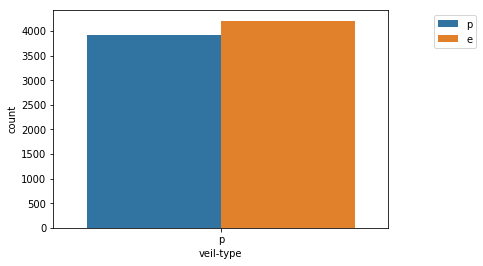

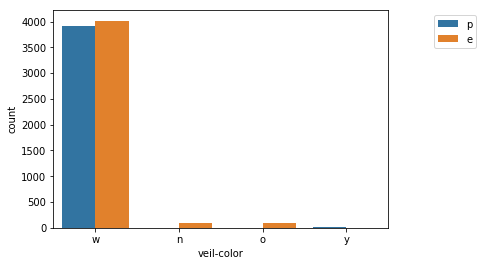

In [18]:
# Visualizing edible and poisonouns mushrooms wrt veil properties

for col in mush_veil.columns:
    sns.countplot(x= col,hue=mushroom['class'], data=mush_veil)
    plt.legend(loc=9, bbox_to_anchor=(1.2, 1))
    plt.show()
    
# Again, mostly useless. 

From the visualizations, we see that certain features could be useful. Such features are - cap-shape, odor, gill-shape, gill-color, stalk-surface-below-ring could be the most informative features. 


### Decision Tree Classifier and Random Forest 

In [19]:
# First get the X and the y out 

X = mushroom.drop('class', axis=1)
y = mushroom['class']

print(X.shape, y.shape)


(8124, 22) (8124,)


In [20]:
# Converting the string values to numeric. 

X_d = pd.get_dummies(X)

In [21]:
X_d.shape  # 22 --> 117 

(8124, 117)

In [22]:
# Training and test datasets 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_d, y, test_size=.3)

print(X_train.shape, y_train.shape, X_test.shape, y_train.shape)

(5686, 117) (5686,) (2438, 117) (5686,)


In [23]:
# Decision Tree classifier -- Default 

from sklearn import tree
from sklearn.model_selection import cross_val_score

#Default Decision Tree
decTree = tree.DecisionTreeClassifier()

decTree.fit(X_train, y_train)

tree_pred = decTree.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score

print('Accuracy score: ', accuracy_score(y_test, tree_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, tree_pred))
print('Crossvalidated accuracy with standard deviation', cross_val_score(decTree, X_train, y_train, cv=10).mean(), 
     ',',cross_val_score(decTree, X_train, y_train, cv=10).std())




Accuracy score:  1.0
Confusion Matrix:  [[1271    0]
 [   0 1167]]
Crossvalidated accuracy with standard deviation 0.999648196737543 , 0.0007036068650783762


In [24]:
# 100% accuracy, seems like the model is overfitting. Let drop the cross-validation to 3. 

#Default Decision Tree
decTree = tree.DecisionTreeClassifier()

decTree.fit(X_train, y_train)

tree_pred = decTree.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score

print('Accuracy score: ', accuracy_score(y_test, tree_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, tree_pred))
print('Crossvalidated accuracy with standard deviation', cross_val_score(decTree, X_train, y_train, cv=3).mean(), 
     ',',cross_val_score(decTree, X_train, y_train, cv=10).std())

# Accuracy score is still 100%, the model is probably not overfitting. 

Accuracy score:  1.0
Confusion Matrix:  [[1271    0]
 [   0 1167]]
Crossvalidated accuracy with standard deviation 0.9994724810646122 , 0.0007036068650783762


In [25]:
# Decision Tree classifier -- selecting a simpler decision tree with decreasing max depth to 3.

from sklearn import tree
from sklearn.model_selection import cross_val_score
decTree = tree.DecisionTreeClassifier(max_depth=3)  # simpler with max depth 3

decTree.fit(X_train, y_train)

tree_pred = decTree.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print('Accuracy score: ', accuracy_score(y_test, tree_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, tree_pred))

cv_score = cross_val_score(decTree, X_train, y_train, cv=10)
print('Mean crossvalidated accuracy with standard deviation: ', cv_score.mean(), ',', cv_score.std())

# The CV accracy is still 98.6% with low standard deviation. 

Accuracy score:  0.9835931091058244
Confusion Matrix:  [[1236   35]
 [   5 1162]]
Mean crossvalidated accuracy with standard deviation:  0.9859318853300758 , 0.00423012145163078


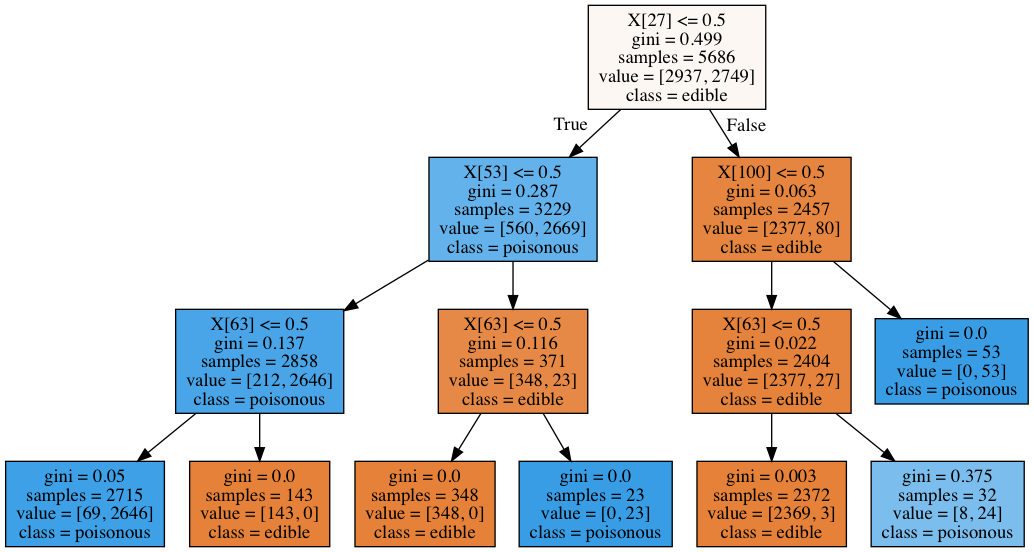

In [26]:
# Render tree visualization
dot_data = tree.export_graphviz(decTree, out_file=None, #feature_names=X_train.co, 
                                class_names = ['edible', 'poisonous'], # ascending numerical order not known, so assuming it's alphabetically ordered 
                                filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [27]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
decTree = tree.DecisionTreeClassifier(max_depth=1)  # simplest Decision Tree with max depth 1

decTree.fit(X_train, y_train)

tree_pred = decTree.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print('Accuracy score: ', accuracy_score(y_test, tree_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, tree_pred))

print('Crossvalidated accuracy ', cross_val_score(decTree, X_train, y_train, cv=10).mean())

# The accuracy decreases but only to 88%. 

Accuracy score:  0.8851517637407711
Confusion Matrix:  [[1031  240]
 [  40 1127]]
Crossvalidated accuracy  0.8874364872652784


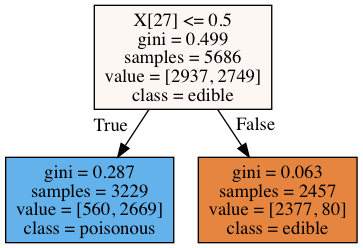

In [28]:
# Render tree visualization
dot_data = tree.export_graphviz(decTree, out_file=None, #feature_names=X_train.co, 
                                class_names = ['edible', 'poisonous'], # ascending numerical order not known, so assuming it's alphabetically ordered 
                                filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [29]:
X_train.columns[27]  # yay! odor is the most important feature, as guessed!

'odor_n'

In [30]:
## Max_Depth to 0 meaning there is no criterion to make a decision, and returns an error 

#from sklearn import tree
#from sklearn.model_selection import cross_val_score
#decTree = tree.DecisionTreeClassifier(max_depth=0)  # simple with max depth 2
#
#decTree.fit(X_train, y_train)
#
#tree_pred = decTree.predict(X_test)
#
#from sklearn.metrics import confusion_matrix, accuracy_score
#print('Accuracy score: ', accuracy_score(y_test, tree_pred))
#print('Confusion Matrix: ', confusion_matrix(y_test, tree_pred))
#print('Crossvalidated accuracy ', cross_val_score(decTree, X_train, y_train, cv=10).mean())


In [31]:
# With a custom decision tree - tuning parameters - criterion entropy, max_feature = sqrt of n_ftr, 
# max_depth gives better accuracy with 7 than the simplest one seen earlier. 


decTree1 = tree.DecisionTreeClassifier(criterion='entropy', max_features='sqrt', 
                                      max_depth=7, random_state=1)

decTree1.fit(X_train, y_train)
tree_pred = decTree1.predict(X_test)


from sklearn.metrics import confusion_matrix, accuracy_score
print('Accuracy score: ', accuracy_score(y_test, tree_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, tree_pred))

print('Crossvalidated accuracy: ', cross_val_score(decTree1, X_train, y_train, cv=10).mean())

Accuracy score:  0.992616899097621
Confusion Matrix:  [[1258   13]
 [   5 1162]]
Crossvalidated accuracy:  0.9938457624175918


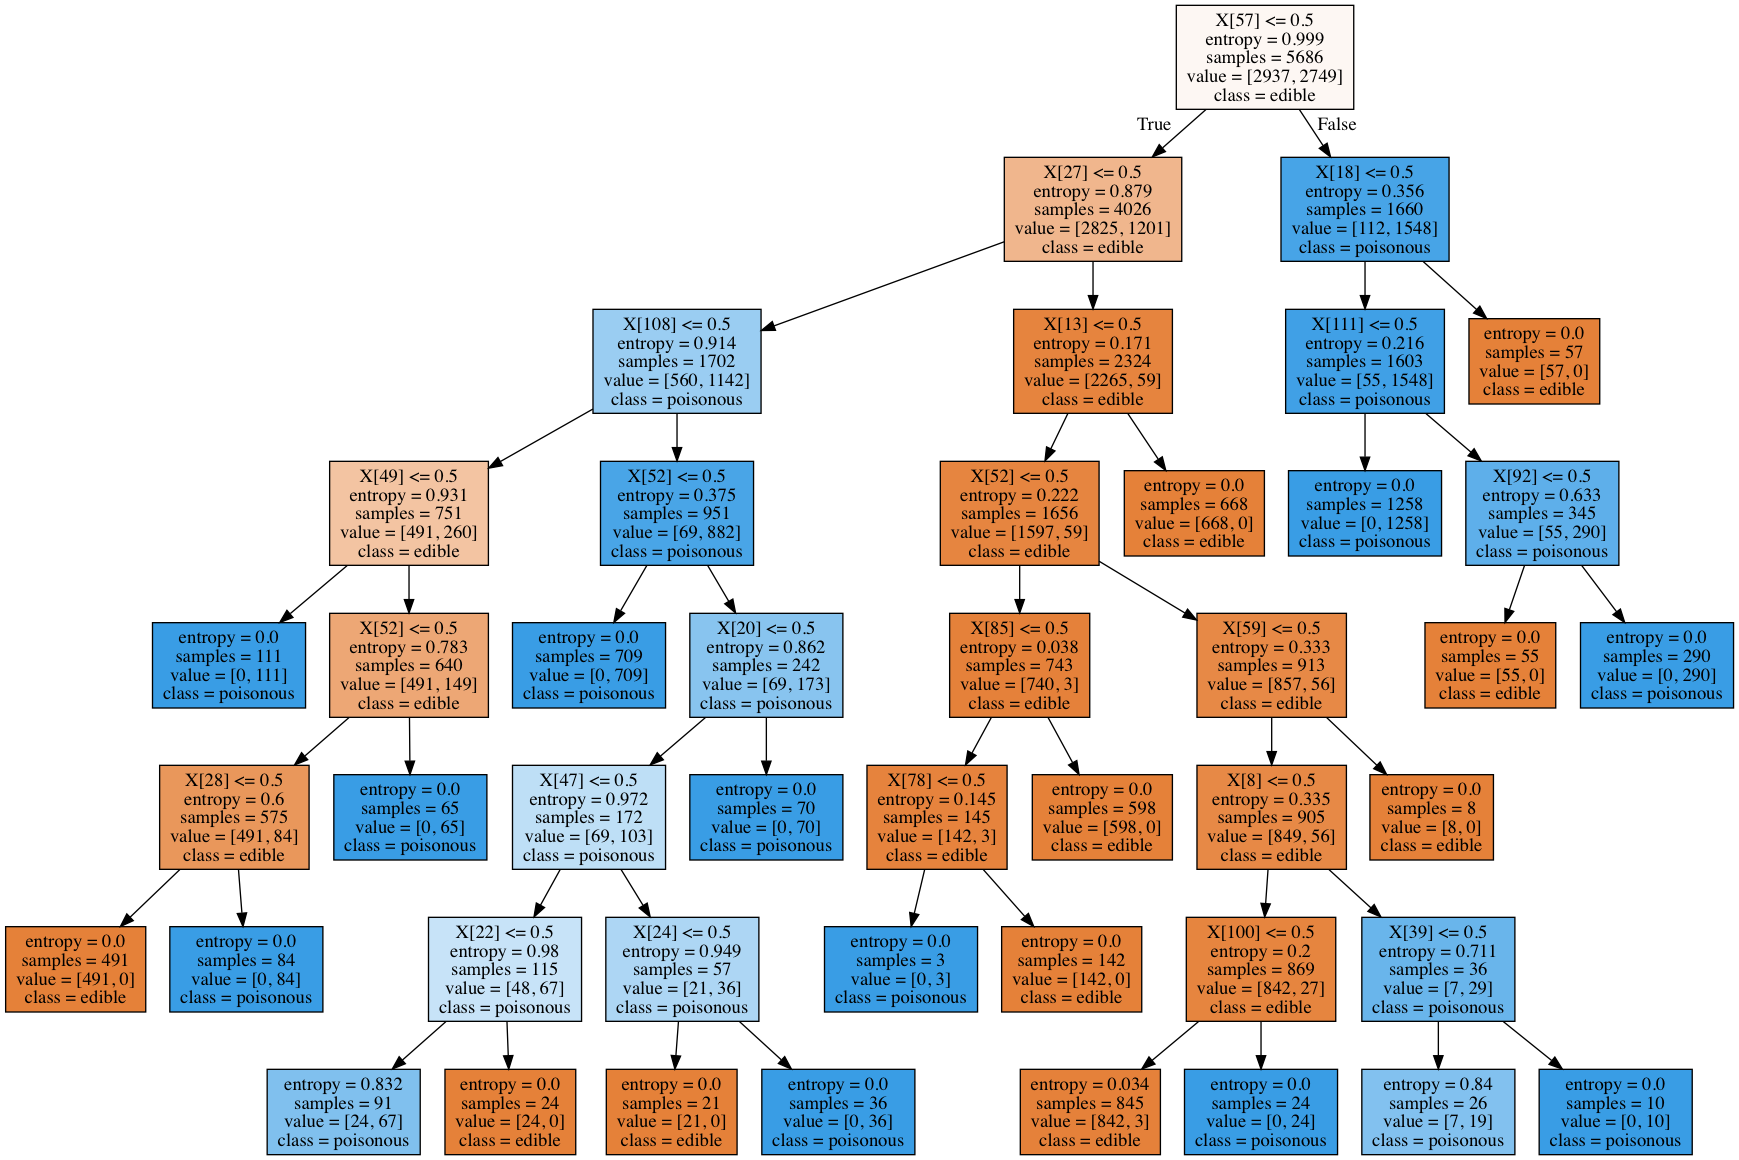

In [32]:
# Render tree 
dot_data = tree.export_graphviz(decTree1, out_file=None, #feature_names=X_train.co, 
                                class_names = ['edible', 'poisonous'],
                                filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Suggestions before moving on to the Random Forest models: 

This dataset consistently gave higher accuracies, even with the simplest (max_depth=1) decision trees. However, if there are lower accuracy scores in Decision Tree models, the following may be useful for improving accuracies: 

First check,  
- If DT is the best model for this, try other models and check the accuracies. 
    
Then, 
- Check if increasing data increases accuracy: take smaller subsets (e.g., n=2000, check the accuracy, increase n (e.g., n=3000), check accuracy and decide if adding more data increases accuracy.  
- Feature engineering: try other features to see if accuracy increases. 
- Check the type of classifier you are using. Try other classifiers - also set respective different parameters. 


## Random Forest

In [33]:
# Trying Random Forest - default RF

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)


print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
print('Crossvalidated accuracy: ', cross_val_score(forest, X_train, y_train, cv=10).mean())


# the accuracy is still 100%

Accuracy score:  1.0
Confusion Matrix:  [[1271    0]
 [   0 1167]]
Crossvalidated accuracy:  1.0


In [34]:
# Trying Random Forest parameters - imitating tuned parameters in the decision tree model above

from sklearn.ensemble import RandomForestClassifier

forest1 = RandomForestClassifier(n_estimators=5, criterion='entropy', 
                                 max_features='sqrt')

forest1.fit(X_train, y_train)
y_pred = forest1.predict(X_test)


print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))

print('Crossvalidated accuracy: ', cross_val_score(forest1, X_train, y_train, cv=10).mean())


Accuracy score:  0.9987694831829368
Confusion Matrix:  [[1271    0]
 [   3 1164]]
Crossvalidated accuracy:  1.0


In [35]:
## Trying this hyperparameter tuning and applying gridsearch

model_RF=RandomForestClassifier()

tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['auto','sqrt','log2']
                    }
    

In [36]:
# Applying gridSearch 

from sklearn.grid_search import RandomizedSearchCV

RF_model= RandomizedSearchCV(model_RF, tuned_parameters,cv=10,scoring='accuracy',n_iter=20,n_jobs= -1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [37]:
RF_model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'min_samples_leaf': range(10, 100, 10), 'n_estimators': range(10, 100, 10), 'max_features': ['auto', 'sqrt', 'log2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='accuracy', verbose=0)

In [38]:
pd.DataFrame(RF_model.grid_scores_)  # a way to see which parameters are better or which values are better

# Looks like almost all the parameters are similar. Let's see the best score and the best parameter. 

,parameters,mean_validation_score,cv_validation_scores
0,"{'n_estimators': 80, 'min_samples_leaf': 10, '...",0.998945,"[0.9982425307557118, 0.9982425307557118, 0.998..."
1,"{'n_estimators': 60, 'min_samples_leaf': 60, '...",0.988568,"[0.9912126537785588, 0.9912126537785588, 0.987..."
2,"{'n_estimators': 30, 'min_samples_leaf': 20, '...",0.998769,"[0.9982425307557118, 0.9982425307557118, 0.998..."
3,"{'n_estimators': 30, 'min_samples_leaf': 80, '...",0.973268,"[0.9595782073813708, 0.9630931458699473, 0.956..."
4,"{'n_estimators': 40, 'min_samples_leaf': 70, '...",0.986282,"[0.984182776801406, 0.9912126537785588, 0.9894..."
5,"{'n_estimators': 80, 'min_samples_leaf': 50, '...",0.989624,"[0.9912126537785588, 0.9912126537785588, 0.989..."
6,"{'n_estimators': 90, 'min_samples_leaf': 90, '...",0.975026,"[0.961335676625659, 0.984182776801406, 0.97715..."
7,"{'n_estimators': 40, 'min_samples_leaf': 20, '...",0.998945,"[0.9982425307557118, 0.9982425307557118, 0.998..."
8,"{'n_estimators': 20, 'min_samples_leaf': 30, '...",0.995955,"[0.9982425307557118, 0.9982425307557118, 0.998..."
9,"{'n_estimators': 90, 'min_samples_leaf': 50, '...",0.988920,"[0.9912126537785588, 0.9912126537785588, 0.989..."


In [39]:
print('Best score:', RF_model.best_score_)

print('Best parameter: ',RF_model.best_params_)

Best score: 0.9989447766443897
Best parameter:  {'n_estimators': 80, 'min_samples_leaf': 10, 'max_features': 'sqrt'}


In [40]:
# Let's predict. 
y_pred_model = RF_model.predict(X_test)

print('Accuracy: ', RF_model.score(X_test, y_pred_model))
print('Confustion Matrix: \n', confusion_matrix(y_test, y_pred_model))
print('AUC-ROC: ', sklearn.metrics.classification_report(y_test, y_pred_model))
#print('AUC-ROC score: ', sklearn.metrics.roc_auc_score(y_test, y_pred_model))

Accuracy:  1.0
Confustion Matrix: 
 [[1271    0]
 [  10 1157]]
AUC-ROC:               precision    recall  f1-score   support

          e       0.99      1.00      1.00      1271
          p       1.00      0.99      1.00      1167

avg / total       1.00      1.00      1.00      2438



In [41]:
# Trying the simplest Random Forest - with max depth =1 and only one tree (n_est = 1)

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=1, n_estimators=1, random_state=1)

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)


print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
print('Crossvalidated accuracy: ', cross_val_score(forest, X_train, y_train, cv=10).mean())

# Even with the simplest RF, the cross-validated accuracy score is 76.6%

Accuracy score:  0.7723543888433142
Confusion Matrix:  [[1236   35]
 [ 520  647]]
Crossvalidated accuracy:  0.77875212120212


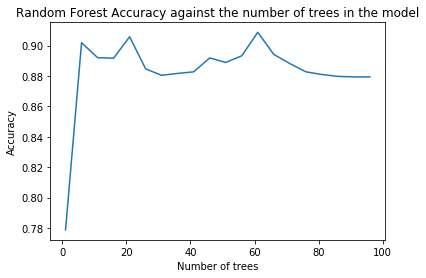

In [42]:
# Let's now check out how timing (for complexity) increases with increasing number of tress. Keeping the depth to 1. 

score = []
final_time = []

for n in np.arange(1, 100, 5): 
    start_time = t.time()
    from sklearn.ensemble import RandomForestClassifier
    
    forest = RandomForestClassifier(max_depth=1, n_estimators=n, random_state=1) #setting seed at 1
    
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)

    #print('Accuracy score: ', accuracy_score(y_test, y_pred))
    #print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
    
    score.append(cross_val_score(forest, X_train, y_train, cv=10).mean())
    end_time = t.time() - start_time
    
    final_time.append(end_time)
plt.plot(np.arange(1, 100, 5), score)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy against the number of trees in the model')
plt.show()

# even with more estimators accuracy does not increase much, and stabilizes after 20. 

In [65]:
#plt.plot(np.arange(1, 100, 5), score)
#plt.xlabel('Number of trees')
#plt.ylabel('Accuracy')
#plt.title('Random Forest Accuracy against the number of trees in the model')
#plt.show()
#

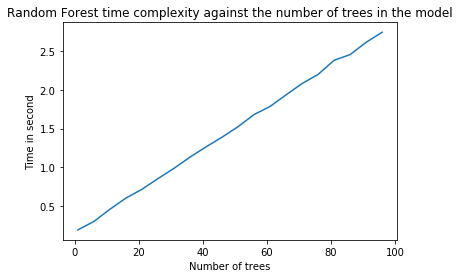

In [44]:
# Let's see the time complexity plot with increasing trees. WRT the previous plot, we see that the time complexity increases
# with increasing number of trees. Hence, we need to optimize the model. 

plt.plot(np.arange(1, 100, 5), final_time)
plt.xlabel('Number of trees')
plt.ylabel('Time in second')
plt.title('Random Forest time complexity against the number of trees in the model')
plt.show()

In [45]:
# Similar to the previous plots, let's now check how the accuracy and time complexity increases with increasing depth (depth of tree)

score = []
final_time = []

for n in np.arange(1, 100, 5):
    
    start_time = t.time()
    from sklearn.ensemble import RandomForestClassifier
    
    forest = RandomForestClassifier(max_depth=n, n_estimators=20) # since 20 was the optimized number for trees in the prev. plot.
    
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)

    #print('Accuracy score: ', accuracy_score(y_test, y_pred))
    #print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
    
    score.append(cross_val_score(forest, X_train, y_train, cv=10).mean())
    end_time = t.time() - start_time
    
    final_time.append(end_time)


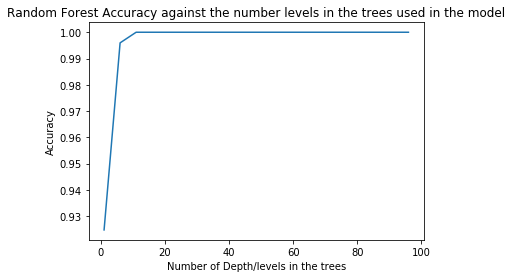

In [46]:
plt.plot(np.arange(1, 100, 5), score)
plt.xlabel('Number of Depth/levels in the trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy against the number levels in the trees used in the model')
plt.show()

# Accuracy plateaus after the depth 20 or so. 

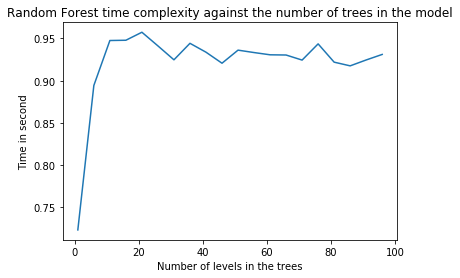

In [47]:
plt.plot(np.arange(1, 100, 5), final_time)
plt.xlabel('Number of levels in the trees')
plt.ylabel('Time in second')
plt.title('Random Forest time complexity against the number of trees in the model')
plt.show()

# This plot with respect to the previous plot shows that even if the accuracy saturates are n_depth =20, 
#the time increases or fluctuates because it's random and often the tress doesn't have to go to that depth for training the models.
# Also, the depth bounces around because it's random at each tree. 

In [48]:
# Let's now optimize the n_depth and n_est together in a bruth force approach. Two for loops, one for each. 

In [49]:
score = [] # to save mean CV score
final_time = [] # to save all runtimes 
complexity = []  # complexity is now measured by depth * number of trees.
params = [] # the parameters for each run 

for d in np.arange(1, 30, 2): 
    for n in np.arange(1, 30, 2): # from the prev. plots we see 20 is the optimized number for both d and n. 
        
        start_time = t.time()
        from sklearn.ensemble import RandomForestClassifier
        
        forest = RandomForestClassifier(max_depth=d, n_estimators=n)
        
        forest.fit(X_train, y_train)
        y_pred = forest.predict(X_test)
        
        score.append(cross_val_score(forest, X_train, y_train, cv=10).mean())
        complexity.append(d*n)
        end_time = t.time() -start_time
        
        final_time.append(end_time)



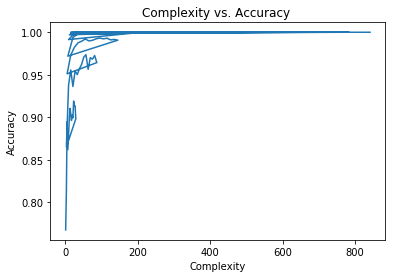

In [50]:
# Plotting complexity with score

plt.plot(complexity, score)
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.title('Complexity vs. Accuracy ')
plt.show()


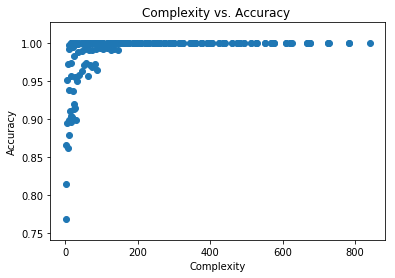

In [51]:
# Same visualization with scatterplot for better visibility/interpretation. 

plt.scatter(complexity, score)
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.title('Complexity vs. Accuracy ')
plt.show()

# with added complexity the accuracy does not increase. 

# Next step, optimize. Also, measure the test times and not the training times as we have been doing so far. 

In [52]:
score = []
final_time = []
complexity = []
params = []

for d in np.arange(1, 30, 2):
    for n in np.arange(1, 30, 2):
        
        from sklearn.ensemble import RandomForestClassifier
        
        forest = RandomForestClassifier(max_depth=d, n_estimators=n)
        
        forest.fit(X_train, y_train)
        
        start_test_time = t.time()
        y_pred = forest.predict(X_test)
        end_test_time = t.time() - start_test_time
        
        #print('Accuracy score: ', accuracy_score(y_test, y_pred))
        #print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
        
        score.append(cross_val_score(forest, X_train, y_train, cv=10).mean())
        complexity.append(d*n)
        params.append({'depth': d, 'n_est': n})
        
        final_time.append(end_test_time)


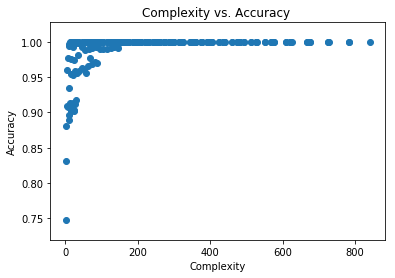

In [53]:
plt.scatter(complexity, score)
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.title('Complexity vs. Accuracy ')
plt.show()


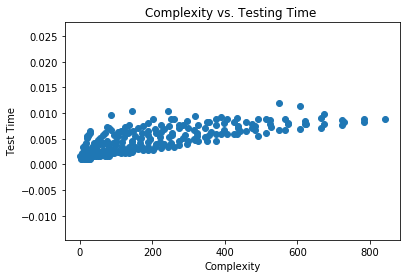

In [54]:
plt.scatter(complexity, final_time)
plt.xlabel('Complexity')
plt.ylabel('Test Time')
plt.title('Complexity vs. Testing Time ')
plt.show()

# Almost approaching a straight line for the testing time. 

In [55]:
# For finding the best pair of depth and trees, in terms of complexity, let's save the results in a dataframe. 

df_params = pd.DataFrame(params)

In [56]:
df_params['complexity'] = complexity 
df_params['time'] = final_time
df_params['score'] = score

In [57]:
df_params.head()

,depth,n_est,complexity,time,score
0,1,1,1,0.001630,0.747121
1,1,3,3,0.001402,0.831704
2,1,5,5,0.001826,0.908723
3,1,7,7,0.002210,0.907689
4,1,9,9,0.003315,0.889563


In [58]:
# Sorting in terms of time and score. Apply different criteria depending on the deciding factor. 

df_params.sort_values(by=['time', 'score'])  # least time and then least score



,depth,n_est,complexity,time,score
15,3,1,3,0.001023,0.880570
45,7,1,7,0.001062,0.977309
165,23,1,23,0.001073,0.999296
180,25,1,25,0.001094,0.999296
195,27,1,27,0.001100,0.998768
150,21,1,21,0.001103,0.999472
90,13,1,13,0.001109,0.999824
105,15,1,15,0.001115,0.999121
120,17,1,17,0.001134,0.999472
60,9,1,9,0.001157,0.994196


In [59]:
df_params.sort_values(by=['score', 'time'])  # least score and then least time
# df_params.sort_values(by=['score', 'time'], ascending=False) # for descending values 

,depth,n_est,complexity,time,score
0,1,1,1,0.001630,0.747121
1,1,3,3,0.001402,0.831704
15,3,1,3,0.001023,0.880570
4,1,9,9,0.003315,0.889563
5,1,11,11,0.003037,0.896250
7,1,15,15,0.003877,0.901686
11,1,23,23,0.005512,0.902039
12,1,25,25,0.006016,0.903456
9,1,19,19,0.005523,0.905917
8,1,17,17,0.004230,0.907671


In [60]:
df_params.sort_values(by=['score', 'complexity'])

,depth,n_est,complexity,time,score
0,1,1,1,0.001630,0.747121
1,1,3,3,0.001402,0.831704
15,3,1,3,0.001023,0.880570
4,1,9,9,0.003315,0.889563
5,1,11,11,0.003037,0.896250
7,1,15,15,0.003877,0.901686
11,1,23,23,0.005512,0.902039
12,1,25,25,0.006016,0.903456
9,1,19,19,0.005523,0.905917
8,1,17,17,0.004230,0.907671


In [61]:
# n_est should weigh more while determining the complexity. 
# Trying redefining complexity as complexity = n_depth * n_est**2

#com = depth + n_est**2

score = []
final_time = []
complexity = []
params = []

for d in np.arange(1, 30, 2):
    for n in np.arange(1, 30, 2):
        
        from sklearn.ensemble import RandomForestClassifier
        
        forest = RandomForestClassifier(max_depth=d, n_estimators=n)
        
        forest.fit(X_train, y_train)
        
        start_test_time = t.time()
        y_pred = forest.predict(X_test)
        end_test_time = t.time() - start_test_time
        
        #print('Accuracy score: ', accuracy_score(y_test, y_pred))
        #print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
        
        score.append(cross_val_score(forest, X_train, y_train, cv=10).mean())
        complexity.append(d* (n**2))
        params.append({'depth': d, 'n_est': (n**2)})
        
        final_time.append(end_test_time)


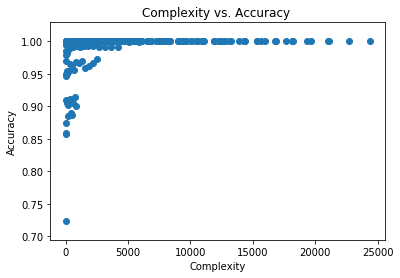

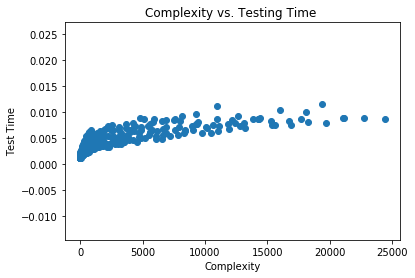

In [62]:
plt.scatter(complexity, score)
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.title('Complexity vs. Accuracy ')
plt.show()


plt.scatter(complexity, final_time)
plt.xlabel('Complexity')
plt.ylabel('Test Time')
plt.title('Complexity vs. Testing Time ')
plt.show()

In [63]:
# n_est should weigh more while determining the complexity. 
# Trying redefining complexity as complexity = n_depth + n_est**2

score = []
final_time = []
complexity = []
params = []

for d in np.arange(1, 30, 2):
    for n in np.arange(1, 30, 2):
        
        from sklearn.ensemble import RandomForestClassifier
        
        forest = RandomForestClassifier(max_depth=d, n_estimators=n)
        
        forest.fit(X_train, y_train)
        
        start_test_time = t.time()
        y_pred = forest.predict(X_test)
        end_test_time = t.time() - start_test_time
        
        #print('Accuracy score: ', accuracy_score(y_test, y_pred))
        #print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
        
        score.append(cross_val_score(forest, X_train, y_train, cv=10).mean())
        complexity.append(d + (n**2))
        params.append({'depth': d, 'n_est': (n**2)})
        
        final_time.append(end_test_time)


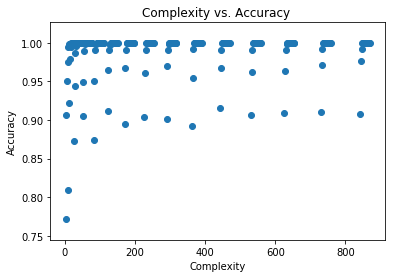

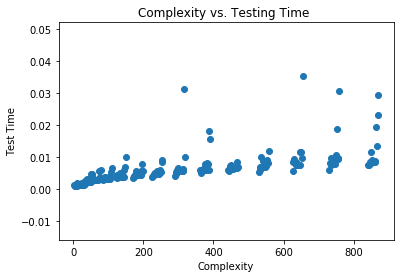

In [64]:
plt.scatter(complexity, score)
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.title('Complexity vs. Accuracy ')
plt.show()


plt.scatter(complexity, final_time)
plt.xlabel('Complexity')
plt.ylabel('Test Time')
plt.title('Complexity vs. Testing Time ')
plt.show()

Both complexities towards the end have linear appearance with testing time. 